In [ ]:
!unzip modelNweight.zip

Archive:  modelNweight.zip
   creating: modelNweight/
  inflating: modelNweight/age_deploy.prototxt  
  inflating: modelNweight/age_net.caffemodel  
  inflating: modelNweight/gender_deploy.prototxt  
  inflating: modelNweight/gender_net.caffemodel  
  inflating: modelNweight/opencv_face_detector.pbtxt  
  inflating: modelNweight/opencv_face_detector_uint8.pb  


In [ ]:
!gdown https://drive.google.com/uc?id=1_aDScOvBeBLCn_iv0oxSO8X1ySQpSbIS

Downloading...
From: https://drive.google.com/uc?id=1_aDScOvBeBLCn_iv0oxSO8X1ySQpSbIS
To: /content/modelNweight.zip
86.2MB [00:00, 113MB/s] 


In [ ]:
!unzip modelNweight.zip

Archive:  modelNweight.zip
   creating: modelNweight/
  inflating: modelNweight/age_deploy.prototxt  
  inflating: modelNweight/age_net.caffemodel  
  inflating: modelNweight/gender_deploy.prototxt  
  inflating: modelNweight/gender_net.caffemodel  
  inflating: modelNweight/opencv_face_detector.pbtxt  
  inflating: modelNweight/opencv_face_detector_uint8.pb  


In [ ]:
import cv2 as cv
import math
import time
from google.colab.patches import cv2_imshow

In [ ]:
def getFaceBox(net, frame, conf_threshold=0.7):
    frameOpencvDnn = frame.copy()
    frameHeight = frameOpencvDnn.shape[0]
    frameWidth = frameOpencvDnn.shape[1]
    blob = cv.dnn.blobFromImage(frameOpencvDnn, 1.0, (300, 300), [104, 117, 123], True, False)

    net.setInput(blob)
    detections = net.forward()
    bboxes = []
    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > conf_threshold:
            x1 = int(detections[0, 0, i, 3] * frameWidth)
            y1 = int(detections[0, 0, i, 4] * frameHeight)
            x2 = int(detections[0, 0, i, 5] * frameWidth)
            y2 = int(detections[0, 0, i, 6] * frameHeight)
            bboxes.append([x1, y1, x2, y2])
            cv.rectangle(frameOpencvDnn, (x1, y1), (x2, y2), (0, 255, 0), int(round(frameHeight/150)), 8)
    return frameOpencvDnn, bboxes

In [ ]:
faceProto = "modelNweight/opencv_face_detector.pbtxt"
faceModel = "modelNweight/opencv_face_detector_uint8.pb"

ageProto = "modelNweight/age_deploy.prototxt"
ageModel = "modelNweight/age_net.caffemodel"

genderProto = "modelNweight/gender_deploy.prototxt"
genderModel = "modelNweight/gender_net.caffemodel"

MODEL_MEAN_VALUES = (78.4263377603, 87.7689143744, 114.895847746)
ageList = ['(0-2)', '(4-6)', '(8-12)', '(15-20)', '(25-32)', '(38-43)', '(48-53)', '(60-100)']
genderList = ['Male', 'Female']

In [ ]:
#Load network
ageNet = cv.dnn.readNet(ageModel, ageProto)
genderNet = cv.dnn.readNet(genderModel, genderProto)
faceNet = cv.dnn.readNet(faceModel, faceProto)

padding = 20

def age_gender_detector(frame):
    # Read frame
    t = time.time()
    frameFace, bboxes = getFaceBox(faceNet, frame)
    for bbox in bboxes:
        # print(bbox)
        face = frame[max(0,bbox[1]-padding):min(bbox[3]+padding,frame.shape[0]-1),max(0,bbox[0]-padding):min(bbox[2]+padding, frame.shape[1]-1)]

        blob = cv.dnn.blobFromImage(face, 1.0, (227, 227), MODEL_MEAN_VALUES, swapRB=False)
        genderNet.setInput(blob)
        genderPreds = genderNet.forward()
        gender = genderList[genderPreds[0].argmax()]
        # print("Gender Output : {}".format(genderPreds))
        print("Gender : {}, conf = {:.3f}".format(gender, genderPreds[0].max()))

        ageNet.setInput(blob)
        agePreds = ageNet.forward()
        age = ageList[agePreds[0].argmax()]
        print("Age Output : {}".format(agePreds))
        print("Age : {}, conf = {:.3f}".format(age, agePreds[0].max()))

        label = "{},{}".format(gender, age)
        cv.putText(frameFace, label, (bbox[0], bbox[1]-10), cv.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 255), 2, cv.LINE_AA)
    return frameFace


Gender : Male, conf = 0.960
Age Output : [[6.6292923e-06 4.8451014e-03 9.8690110e-01 7.6140440e-03 3.8931117e-04
  4.5882029e-05 1.8064312e-04 1.7427488e-05]]
Age : (8-12), conf = 0.987


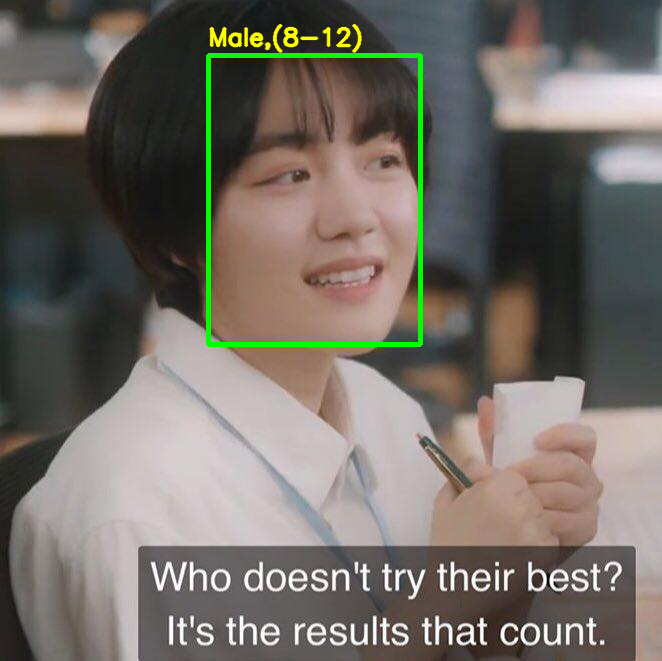

In [ ]:
input = cv.imread("img.jpg")
output = age_gender_detector(input)
cv2_imshow(output)

Gender : Male, conf = 1.000
Age Output : [[1.4747091e-01 8.3990538e-01 1.1385140e-02 6.6416251e-05 1.0755135e-03
  1.9096497e-05 6.0734277e-05 1.6680609e-05]]
Age : (4-6), conf = 0.840


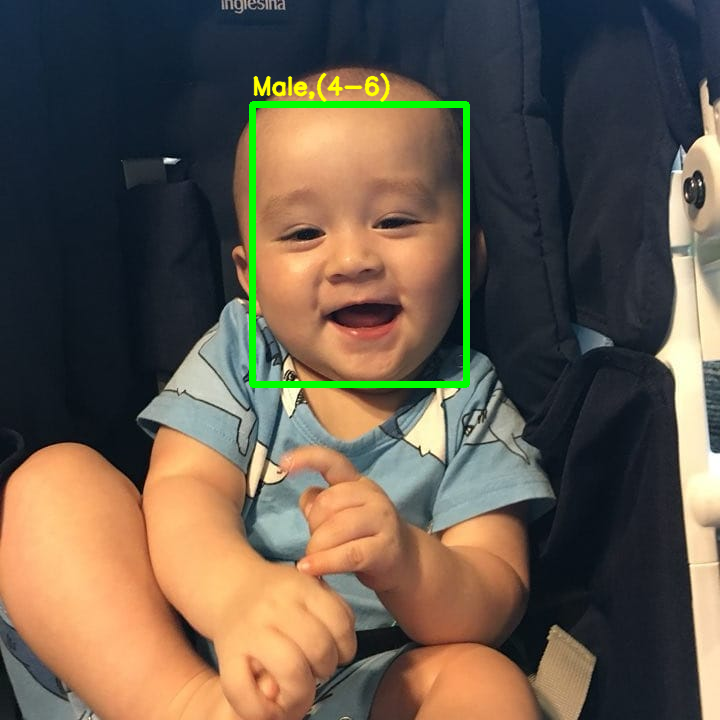

In [ ]:
input = cv.imread("img_01.jpg")
output = age_gender_detector(input)
cv2_imshow(output)

Gender : Female, conf = 1.000
Age Output : [[7.0543727e-03 9.9129981e-01 1.4369203e-03 1.2460921e-05 1.0324128e-04
  2.2067939e-05 6.5519089e-05 5.5418982e-06]]
Age : (4-6), conf = 0.991


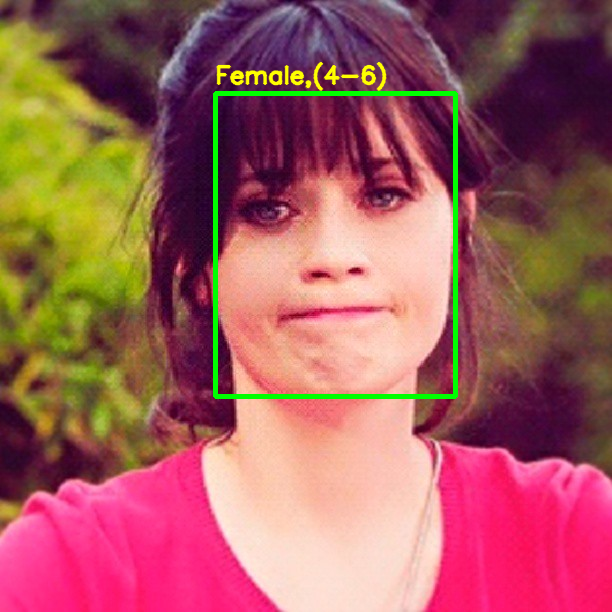

In [ ]:
input = cv.imread("img_02.jpg")
output = age_gender_detector(input)
cv2_imshow(output)

Gender : Male, conf = 1.000
Age Output : [[2.9648825e-07 4.8071172e-07 1.6326085e-06 1.2097977e-05 9.9633956e-01
  3.5394728e-03 7.5546246e-05 3.1005176e-05]]
Age : (25-32), conf = 0.996


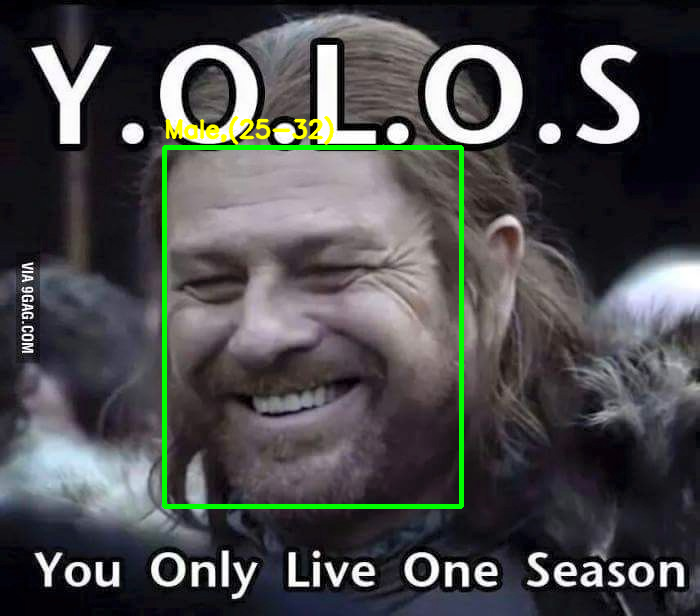

In [ ]:
input = cv.imread("img_04.jpg")
output = age_gender_detector(input)
cv2_imshow(output)

Gender : Female, conf = 0.966
Age Output : [[0.00339256 0.00782033 0.02647044 0.17998077 0.47393158 0.24866535
  0.05232511 0.00741383]]
Age : (25-32), conf = 0.474


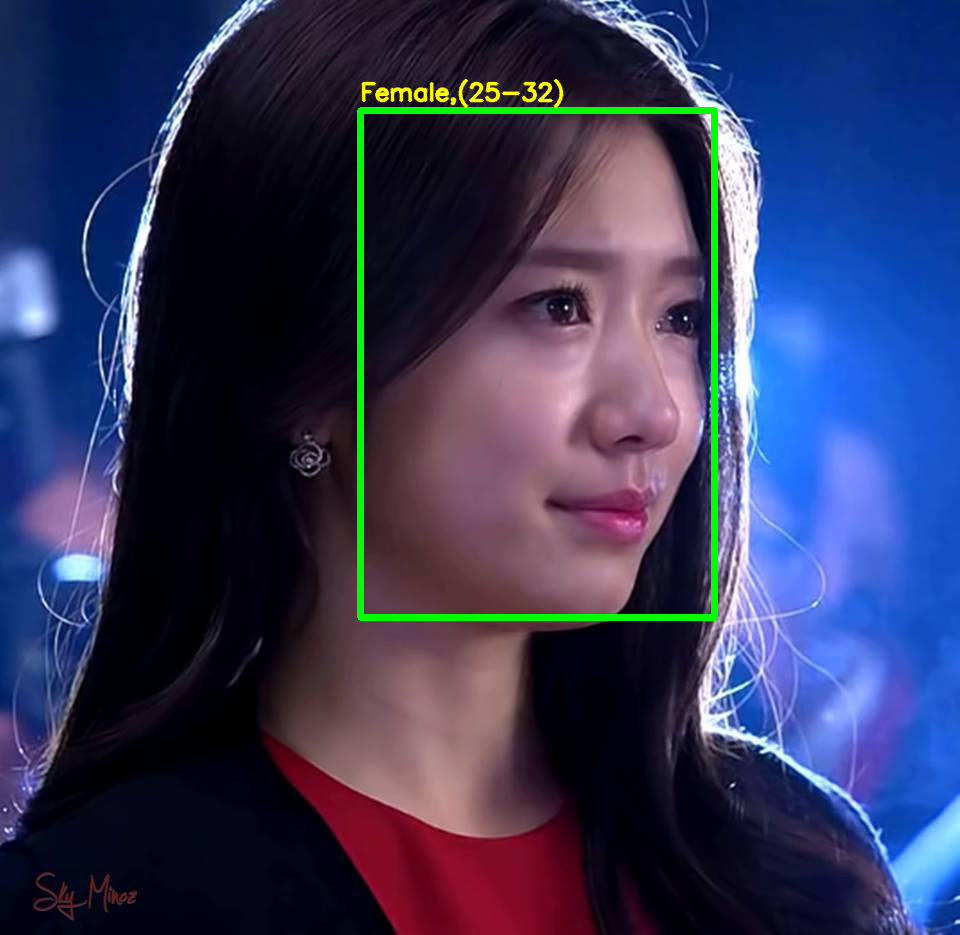

In [ ]:
input = cv.imread("img_05.jpg")
output = age_gender_detector(input)
cv2_imshow(output)

In [ ]:
import cv2
cap = cv2.VideoCapture('video.mp4')
ret, frame = cap.read()
frame_height, frame_width, _ = frame.shape
out = cv2.VideoWriter('output.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 10, (frame_width,frame_height))
print("Processing Video...")
while cap.isOpened():
  ret, frame = cap.read()
  if not ret:
    out.release()
    break
  output = age_gender_detector(frame)
  out.write(output)
out.release()
print("Done processing video")

Gender : Female, conf = 0.966
Age Output : [[0.00339256 0.00782033 0.02647044 0.17998077 0.47393158 0.24866535
  0.05232511 0.00741383]]
Age : (25-32), conf = 0.474


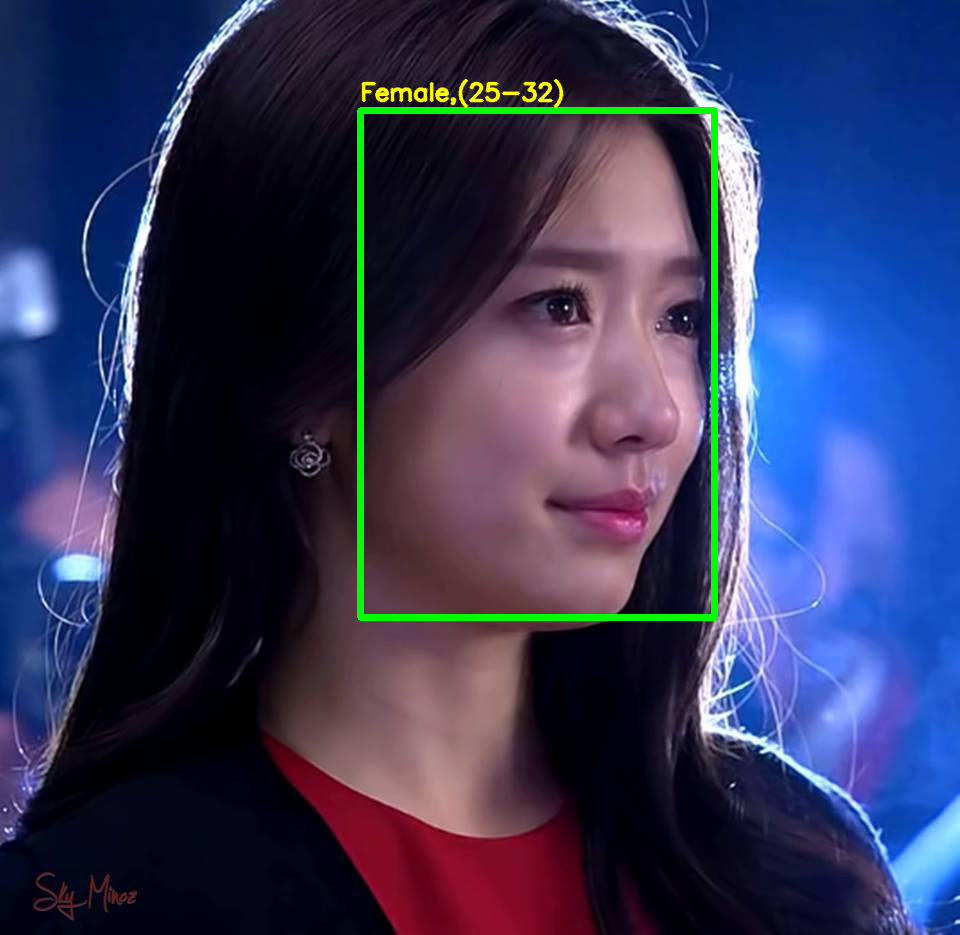

In [ ]:
input = cv.imread("img_05.jpg")
output = age_gender_detector(input)
cv2_imshow(output)